Benjamin Cavallari

In the cell below, include **all** your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Using a single function that takes $t$ as an input and outputs both $x$ and $y$, create a plot of the exact trajectory of a particle undergoing projectile motion with initial conditions $(x, y) = (0, 0)$ and $(v_x, v_y) = (30, 40)~{\rm m/s}$.

<function matplotlib.pyplot.show(close=None, block=None)>

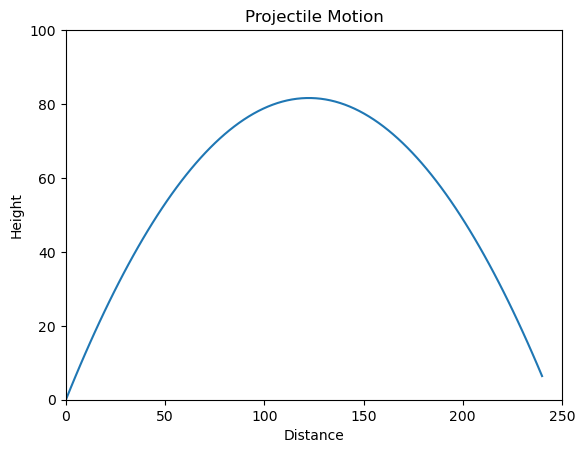

In [5]:
vx_0 = 30
vy_0 = 40
g = 9.8

def projectile(t):
    x = vx_0*t
    y = (vy_0*t)-(0.5*(g)*(t**2))
    return x, y

time_values = np.linspace(0,8,100)
x_values = np.zeros(len(time_values))
y_values = np.zeros(len(time_values))

for i in range(len(time_values)):
    x_values[i], y_values[i] = projectile(time_values[i])

plt.plot(x_values, y_values)
plt.ylim(0,100)
plt.xlim(0,250)
plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")
plt.show

Use the ``time_step`` method to find an approximate solution to the projectile motion problem that solves the four differential equations for $dx/dt$, $dy/dt$, $dv_x/dt$, and $dv_y/dt$. Your code should
- Include the ``%%time`` magic command to determine how long your code took to run
- Include a y vs. x graph that includes both the exact solution as well as the approximate solution, using line styles and a legend to distinguish the two curves.
- Include an energy vs. time graph
- Make $dt$ as small as possible without taking too long to run on your computer.

Text(0.5, 1.0, 'Energy Vs Time')

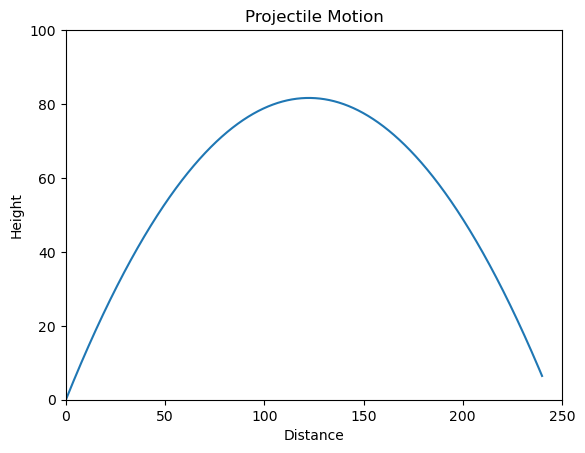

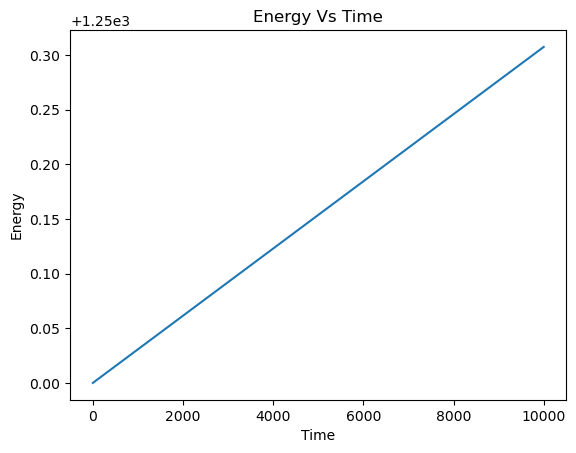

In [7]:
def time_step(x,y,vx,vy,dt):
    ax = 0
    ay = - 9.8
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    
    return xf, yf, vxf, vyf

def inst_energy(x, y, vx, vy):
    g = 9.8
    E = ((1/2)*((vx**2)+(vy**2)))+(g*y)
    return E


time = np.linspace(0,8,10000)

dt = time[1] - time[0]

x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
energy = np.zeros(len(time))

x = 0
y = 0
vx = vx_0
vy = vy_0
energy[0] = inst_energy(x, y, vx, vy)
x_step[0] = x
y_step[0] = y

for i in range(1, len(time)):
    x, y, vx, vy= time_step(x, y, vx, vy, dt)
    energy[i] = inst_energy(x, y, vx, vy)
    x_step[i] = x
    y_step[i] = y

plt.figure()





plt.plot(x_step,y_step)
plt.ylim(0,100)
plt.xlim(0,250)
plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")

plt.figure()
plt.plot(energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Vs Time")


**Exercise:** Include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$. Create the same plots as found in the projectile motion (zero air resistance) problem.

Text(0.5, 1.0, 'Energy Vs Time')

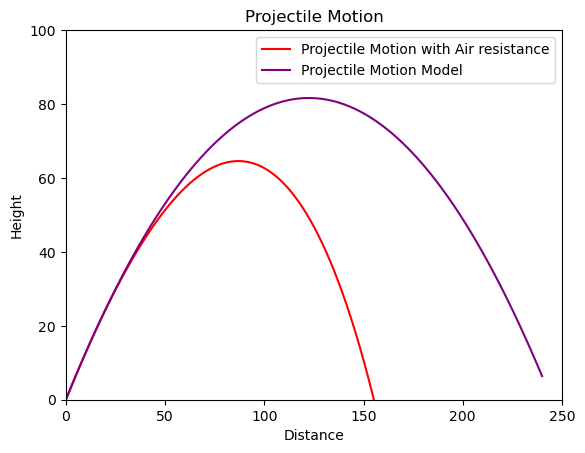

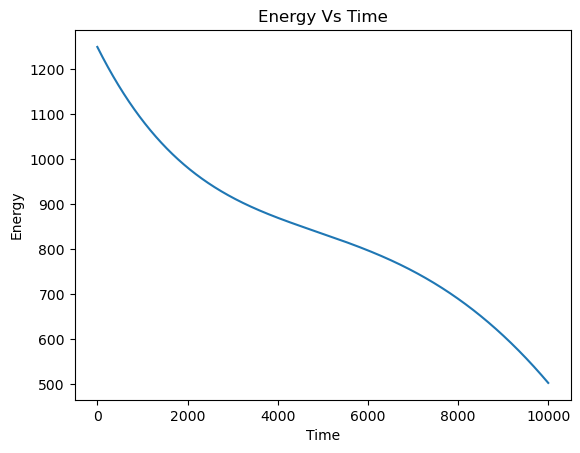

In [28]:
def time_step(x,y,vx,vy,dt):
    b = 0.1
    ax = -b*vx
    ay = - 9.8-(b*vy)
    xf = x + vx * dt
    yf = y + vy * dt
    vxf = vx + ax * dt
    vyf = vy + ay * dt
    
    return xf, yf, vxf, vyf
    def inst_energy(x, y, vx, vy):
        g = 9.8
        E = ((1/2)*((vx**2)+(vy**2)))+(g*y)
        return E


time = np.linspace(0,8,10000)

dt = time[1] - time[0]

x_step = np.zeros(len(time))
y_step = np.zeros(len(time))
energy = np.zeros(len(time))

x = 0
y = 0
vx = vx_0
vy = vy_0
energy[0] = inst_energy(x, y, vx, vy)
x_step[0] = x
y_step[0] = y
for i in range(1, len(time)):
    x, y, vx, vy= time_step(x, y, vx, vy, dt)
    energy[i] = inst_energy(x, y, vx, vy)
    x_step[i] = x
    y_step[i] = y

plt.figure()
plt.plot(x_step,y_step, color='red', label='Projectile Motion with Air resistance')
plt.plot(x_values, y_values, color='purple', label= 'Projectile Motion Model')
plt.legend(loc='upper right')

#plt.plot(x_values, y_values)
#plt.plot(x_step,y_step)
plt.ylim(0,100)
plt.xlim(0,250)
plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")

plt.figure()
plt.plot(energy)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Vs Time")

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.